In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import collections
from keras.preprocessing import image
import pickle
from keras.layers import *

In [65]:
#Importing Description of each training image.
with open("C:/Users/HP/Desktop/Santosh/Flickr8k_text/Flickr8k.token.txt") as f:
    data=f.read()

In [66]:
#Splitting the data captions line by line.
data=data.split("\n")[:-1]

In [67]:
#Displaying description of first Image.
data[:5]

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .']

In [68]:
imgids=[]
for line in data:
    curid=line.split("\t")[0]
    curid=curid.split(".")[0]
    imgids.append(curid)

In [69]:
imgids[:5]

['1000268201_693b08cb0e',
 '1000268201_693b08cb0e',
 '1000268201_693b08cb0e',
 '1000268201_693b08cb0e',
 '1000268201_693b08cb0e']

In [72]:
first,second=data[0].split("\t")

In [75]:
descriptions={}
for line in data:
    first,second=line.split('\t')
    imageid=first.split(".")[0]
    
    if descriptions.get(imageid) is None:
        descriptions[imageid]=[]
    
    descriptions[imageid].append(second)

In [76]:
descriptions["1000268201_693b08cb0e"]

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [79]:
def clean_caption(caption):
    caption=caption.lower()
    caption=re.sub("[^a-z]+"," ",caption)
    caption=[word for word in caption.split() if len(word)>1]
    caption=" ".join(caption)
    return caption

In [80]:
clean_caption("My cat is , running at %& 40")

'my cat is running at'

In [81]:
#Storing image name and caption associated in Dictionary
for key in descriptions.keys():
    for j,caption in enumerate(descriptions[key]):
        descriptions[key][j] = clean_caption(caption)

In [82]:
descriptions["1000268201_693b08cb0e"]

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

In [83]:
#vcabulary set is created.
vocab=set()
for key in descriptions.keys():
    [ vocab.update(cap.split()) for cap in descriptions[key] ]

In [86]:
total_words=[]
for key in descriptions.keys():
    [total_words.append(word) for cap in descriptions[key]  for word in (cap.split()) ]

In [89]:
freq_cnt=dict(collections.Counter(total_words))

In [90]:
#Frequency of each word.
freq_cnt

{'child': 1545,
 'in': 18987,
 'pink': 739,
 'dress': 348,
 'is': 9345,
 'climbing': 507,
 'up': 1302,
 'set': 109,
 'of': 6723,
 'stairs': 109,
 'an': 2432,
 'entry': 1,
 'way': 53,
 'girl': 3328,
 'going': 149,
 'into': 1074,
 'wooden': 284,
 'building': 511,
 'little': 1768,
 'playhouse': 6,
 'the': 18420,
 'to': 3176,
 'her': 1178,
 'cabin': 4,
 'black': 3848,
 'dog': 8138,
 'and': 8863,
 'spotted': 38,
 'are': 3505,
 'fighting': 133,
 'tri': 14,
 'colored': 221,
 'playing': 2008,
 'with': 7765,
 'each': 430,
 'other': 773,
 'on': 10746,
 'road': 398,
 'white': 3959,
 'brown': 2578,
 'spots': 29,
 'staring': 57,
 'at': 2916,
 'street': 944,
 'two': 5643,
 'dogs': 2125,
 'different': 46,
 'breeds': 5,
 'looking': 744,
 'pavement': 48,
 'moving': 41,
 'toward': 146,
 'covered': 372,
 'paint': 62,
 'sits': 577,
 'front': 1386,
 'painted': 64,
 'rainbow': 22,
 'hands': 246,
 'bowl': 30,
 'sitting': 1368,
 'large': 1237,
 'small': 1278,
 'grass': 1622,
 'plays': 526,
 'fingerpaints': 3,

In [91]:
threshold=10
total_words=[word for word,freq in freq_cnt.items() if freq > threshold] 

In [92]:
len(total_words)

1845

In [93]:
def read_file(file_path):
    with open(file_path) as f:
        text=f.read()
    
    return text

In [94]:
#Splitting of testing and training images
traintext=read_file("C:/Users/HP/Desktop/Santosh/Flickr8k_text/Flickr_8k.trainImages.txt")
testtext=read_file("C:/Users/HP/Desktop/Santosh/Flickr8k_text/Flickr_8k.testImages.txt")

In [95]:
type(traintext)

str

In [96]:
train=[row.split(".")[0] for row in traintext.split("\n")][:-1]
test=[row.split(".")[0] for row in testtext.split("\n")][:-1]

In [97]:
len(train)

6000

In [98]:
train

['2513260012_03d33305cf',
 '2903617548_d3e38d7f88',
 '3338291921_fe7ae0c8f8',
 '488416045_1c6d903fe0',
 '2644326817_8f45080b87',
 '218342358_1755a9cce1',
 '2501968935_02f2cd8079',
 '2699342860_5288e203ea',
 '2638369467_8fc251595b',
 '2926786902_815a99a154',
 '2851304910_b5721199bc',
 '3423802527_94bd2b23b0',
 '3356369156_074750c6cc',
 '2294598473_40637b5c04',
 '1191338263_a4fa073154',
 '2380765956_6313d8cae3',
 '3197891333_b1b0fd1702',
 '3119887967_271a097464',
 '2276499757_b44dc6f8ce',
 '2506892928_7e79bec613',
 '2187222896_c206d63396',
 '2826769554_85c90864c9',
 '3097196395_ec06075389',
 '3603116579_4a28a932e2',
 '3339263085_6db9fd0981',
 '2532262109_87429a2cae',
 '2076906555_c20dc082db',
 '2502007071_82a8c639cf',
 '3113769557_9edbb8275c',
 '3325974730_3ee192e4ff',
 '1655781989_b15ab4cbff',
 '1662261486_db967930de',
 '2410562803_56ec09f41c',
 '2469498117_b4543e1460',
 '69710415_5c2bfb1058',
 '3414734842_beb543f400',
 '3006217970_90b42e6b27',
 '2192411521_9c7e488c5e',
 '3535879138_928

In [99]:
descriptions['1000268201_693b08cb0e']

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

In [100]:
train_descriptions={}
for image_id in train:
    train_descriptions[image_id]=[]
    for cap in descriptions[image_id]:
        newcap="startseq " + cap + " endseq"
        train_descriptions[image_id].append(newcap)

In [101]:
len(train_descriptions['1000268201_693b08cb0e'][0].split())

16

In [102]:
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.models import Sequential,Model

In [103]:
#ResNet model is created.
model=ResNet50(weights='imagenet',input_shape=(224,224,3))

In [104]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [105]:
model_new=Model(model.input,model.layers[-2].output)

In [106]:
model_new.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [108]:
#Preprocessing of an Input image.
def preprocess_image(img_path):
    img=image.load_img(img_path,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    return img

In [109]:
#Encoding to create Feature Vector
def encode_image(img_path):
    img=preprocess_image(img_path)
    feature_vector=model_new.predict(img)
    feature_vector=feature_vector.reshape((-1,))
    return feature_vector

In [111]:
encoding_test={}
for index,imageid in enumerate(test):
    feature_vector=encode_image("C:/Users/HP/Desktop/Santosh/Flickr8k_Dataset/Flicker8k_Dataset/" + imageid + ".jpg")
    encoding_test[imageid]=feature_vector

    if index%100 == 0:
        print("encoding test image no %d"%index)

encoding test image no 0
encoding test image no 100
encoding test image no 200
encoding test image no 300
encoding test image no 400
encoding test image no 500
encoding test image no 600
encoding test image no 700
encoding test image no 800
encoding test image no 900


In [112]:
encoding_train={}
for index,imgid in enumerate(train):
    feature_vector=encode_image("C:/Users/HP/Desktop/Santosh/Flickr8k_Dataset/Flicker8k_Dataset/" + imgid + ".jpg")
    encoding_train[imgid] = feature_vector
    
    if index%100 == 0: 
        print("encoding image no %d "%index)

encoding image no 0 
encoding image no 100 
encoding image no 200 
encoding image no 300 
encoding image no 400 
encoding image no 500 
encoding image no 600 
encoding image no 700 
encoding image no 800 
encoding image no 900 
encoding image no 1000 
encoding image no 1100 
encoding image no 1200 
encoding image no 1300 
encoding image no 1400 
encoding image no 1500 
encoding image no 1600 
encoding image no 1700 
encoding image no 1800 
encoding image no 1900 
encoding image no 2000 
encoding image no 2100 
encoding image no 2200 
encoding image no 2300 
encoding image no 2400 
encoding image no 2500 
encoding image no 2600 
encoding image no 2700 
encoding image no 2800 
encoding image no 2900 
encoding image no 3000 
encoding image no 3100 
encoding image no 3200 
encoding image no 3300 
encoding image no 3400 
encoding image no 3500 
encoding image no 3600 
encoding image no 3700 
encoding image no 3800 
encoding image no 3900 
encoding image no 4000 
encoding image no 4100 
enco

In [117]:
#Storing feature vector
with open("C:/Users/HP/Desktop/Santosh/encoding_feature_vector",'wb') as f:
    pickle.dump(encoding_train,f)

In [118]:
encoding_train["1000268201_693b08cb0e"]

array([0.04154296, 0.17076096, 0.29278585, ..., 0.050896  , 0.31322375,
       0.8600747 ], dtype=float32)

In [119]:
print(len(total_words))

1845


In [120]:
word_to_index={}
index_to_word={}

for i in range(len(total_words)):
    index_to_word[i+1]=total_words[i]
    word_to_index[total_words[i]]=i+1

In [121]:
word_to_index["child"]

1

In [122]:
index_to_word[1]

'child'

In [123]:
len(index_to_word)

1845

In [124]:
word_to_index["startseq"]=1846
index_to_word[1846]="startseq"

In [125]:
word_to_index["endseq"]=1847
index_to_word[1847]="endseq"

In [129]:
max_len=0
for image_id in train_descriptions.keys():
    for cap in train_descriptions[image_id]:
        max_len=max(max_len,len(cap.split()))

In [130]:
max_len

35

## word embeddings


In [131]:
#Importing Corpus.
f=open("C:/Users/HP/Desktop/Santosh/glove6b50dtxt/glove.6B.50d.txt",encoding="utf-8")

In [132]:
text=f.readlines()

In [133]:
text[0]

'the 0.418 0.24968 -0.41242 0.1217 0.34527 -0.044457 -0.49688 -0.17862 -0.00066023 -0.6566 0.27843 -0.14767 -0.55677 0.14658 -0.0095095 0.011658 0.10204 -0.12792 -0.8443 -0.12181 -0.016801 -0.33279 -0.1552 -0.23131 -0.19181 -1.8823 -0.76746 0.099051 -0.42125 -0.19526 4.0071 -0.18594 -0.52287 -0.31681 0.00059213 0.0074449 0.17778 -0.15897 0.012041 -0.054223 -0.29871 -0.15749 -0.34758 -0.045637 -0.44251 0.18785 0.0027849 -0.18411 -0.11514 -0.78581\n'

In [134]:
word_embedding={}

In [135]:
for line in text:
    line=line.split()
    word=line[0]
    embedding=np.asarray(line[1:],dtype='float')
    word_embedding[word]=embedding

In [136]:
word_embedding["the"]

array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01])

In [137]:
f.close()

# create embedding matrix

In [138]:
vocab_size=len(index_to_word)

In [139]:
embedding_matrix=np.zeros((vocab_size,50))

In [140]:
for word in word_to_index.keys():
    index=word_to_index[word]
    
    if word_embedding.get(word) is not None:
        embedding_matrix[index] = word_embedding[word] 

In [141]:
embedding_matrix[1]

array([ 0.30459 ,  0.40631 , -0.37512 , -1.2075  ,  1.0473  ,  1.579   ,
       -0.15254 , -0.27604 ,  1.0093  ,  0.08583 ,  0.17895 ,  0.26302 ,
        0.2241  , -0.39434 ,  1.4092  , -0.43509 , -0.6516  ,  0.10294 ,
        0.73823 ,  0.20905 , -0.1405  ,  1.1462  , -0.1672  ,  0.5987  ,
        0.31977 , -1.9205  , -0.25067 , -0.94027 ,  0.33703 , -0.20613 ,
        2.6765  ,  0.28159 , -0.37146 , -0.80129 ,  0.30049 ,  0.57209 ,
        0.326   , -0.4331  ,  0.60803 , -0.71701 , -0.68058 ,  0.080862,
        0.40396 ,  0.24926 ,  0.61058 , -0.48516 ,  0.12207 , -1.1695  ,
        0.33096 ,  0.46469 ])

In [142]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [143]:
def data_generator(train_descriptions,encoding_train,word_to_idx,max_len,batch_size):
    X1,X2,Y=[],[],[]
    n=0
    
    while True:
        for image_id,caption_list in train_descriptions.items():
            n+=1
            photo=encoding_train[image_id]
            
            for cap in caption_list:
                seq=[word_to_idx[word] for word in cap.split() if word in word_to_idx]
                
                for i in range(1,len(seq)):
                    xi=seq[0:i]
                    yi=seq[i]
                    
                    xi=pad_sequences([xi],maxlen=max_len,value=0,padding='post')[0]
                    yi=to_categorical([yi],num_classes=vocab_size)[0]
                    
                    X2.append(xi)
                    X1.append(photo)
                    Y.append(yi)
                    
                    if n==batch_size:
                        yield [ [np.array(X1),np.array(X2)] , np.array(Y) ]
                        
                        X1,X2,Y=[],[],[]
                        n=0

In [145]:
vocab_size=1848

In [146]:
image_featurevector=Input(shape=(2048,))
inp1=Dropout(0.3)(image_featurevector)
output1=Dense(256,activation='relu')(inp1)

In [147]:
partial_caption=Input(shape=(35,))
embout=Embedding(input_dim=vocab_size,output_dim=50,mask_zero=True)(partial_caption)
dropout=Dropout(0.3)(embout)
output2=LSTM(256)(dropout)

In [148]:
#MLP
decoder1=add([output1,output2])
den1=Dense(256,activation="relu")(decoder1)
out_prob_dist=Dense(vocab_size,activation="softmax")(den1)

In [149]:
#combined/integrated model
model=Model(inputs=[image_featurevector,partial_caption],outputs=out_prob_dist)

In [150]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 35)           0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 35, 50)       92400       input_5[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 2048)         0           input_4[0][0]                    
____________________________________________________________________________________________

In [151]:
model.layers[2].trainable=False
model.layers[2].set_weights=[embedding_matrix]

In [152]:
#Optimizer
model.compile(loss="categorical_crossentropy",optimizer="adam")

In [155]:
#Model Training
epochs=18
number_pics_per_bath=3
step=len(train_descriptions)

for i in range(epochs):
    generator=data_generator(train_descriptions,encoding_train,word_to_index,max_len,number_pics_per_bath)
    model.fit_generator(generator,steps_per_epoch=step,verbose=True,epochs=1)

Epoch 1/1
6000/6000 [==============================] - 1090s 182ms/step - loss: 3.6865
Epoch 1/1
6000/6000 [==============================] - 1139s 190ms/step - loss: 3.4297
Epoch 1/1
6000/6000 [==============================] - 1109s 185ms/step - loss: 3.2646
Epoch 1/1
6000/6000 [==============================] - 1122s 187ms/step - loss: 3.1419
Epoch 1/1
6000/6000 [==============================] - 1107s 184ms/step - loss: 3.0482
Epoch 1/1
6000/6000 [==============================] - 1254s 209ms/step - loss: 2.9719
Epoch 1/1
6000/6000 [==============================] - 4884s 814ms/step - loss: 2.9106
Epoch 1/1
6000/6000 [==============================] - 1203s 201ms/step - loss: 2.8594
Epoch 1/1
6000/6000 [==============================] - 1252s 209ms/step - loss: 2.8143
Epoch 1/1
6000/6000 [==============================] - 1142s 190ms/step - loss: 2.7753
Epoch 1/1
6000/6000 [==============================] - 1117s 186ms/step - loss: 2.7437
Epoch 1/1
6000/6000 [======================

In [156]:
model.save("myimagecaptioningmodel.h5")

In [157]:
def predict_caption(photo):
    in_text="startseq "
    
    for i in range(max_len):
        sequence=[word_to_index[word] for word in in_text.split() if word in word_to_index]
        sequence=pad_sequences([sequence],maxlen=max_len,padding="post")
        
        probdist=model.predict([photo,sequence])
        index=np.argmax(probdist)
        wordpredicted=index_to_word[index]
        
        in_text += (wordpredicted + " ")
        
        if wordpredicted == "endseq":
            break
     
    in_text=in_text.split()
    in_text=in_text[1:-1]
    in_text=" ".join(in_text)
    return in_text

two children are playing in the grass


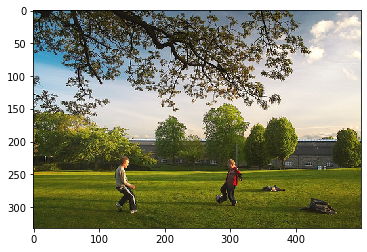

young boy running in the water


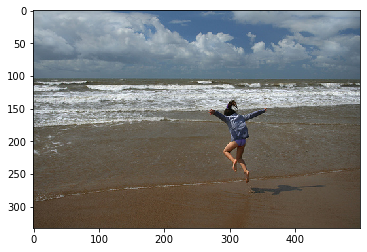

In [164]:
#Testing the model against Unknown images.
for i in range(2):
    index_of_image=np.random.randint(0,1000)
    allimage_ids=list(encoding_test.keys())
    testimageid=allimage_ids[index_of_image]
    phototest=encoding_test[testimageid].reshape((1,2048))
    caption=predict_caption(phototest)
    
    print(caption)
    finalimage=plt.imread("C:/Users/HP/Desktop/Santosh/Flickr8k_Dataset/Flicker8k_Dataset/" + testimageid + ".jpg")
    plt.imshow(finalimage)
    plt.show()